In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [3]:
# Load Model
model = joblib.load('fraud_activity_model.pkl')


In [4]:
# Load Test Data
test_data = pd.read_csv('test_fraud_transactions.csv')

In [5]:
print(test_data["isFraud"].value_counts())

isFraud
0    153857
1      2385
Name: count, dtype: int64


In [6]:
# Split Features & Target
X_test = test_data.drop(columns=['isFraud'])
y_test = test_data['isFraud']

In [7]:
# Model Evaluation
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [8]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📊 Confusion Matrix:\n", conf_matrix)


📊 Confusion Matrix:
 [[92063 61794]
 [  490  1895]]


In [9]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\n🔍 Classification Report:\n", class_report)


🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.60      0.75    153857
           1       0.03      0.79      0.06      2385

    accuracy                           0.60    156242
   macro avg       0.51      0.70      0.40    156242
weighted avg       0.98      0.60      0.74    156242



In [10]:
# Compute AUC Score
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print(f"\n🚀 AUC Score: {roc_auc:.4f}")


🚀 AUC Score: 0.7837


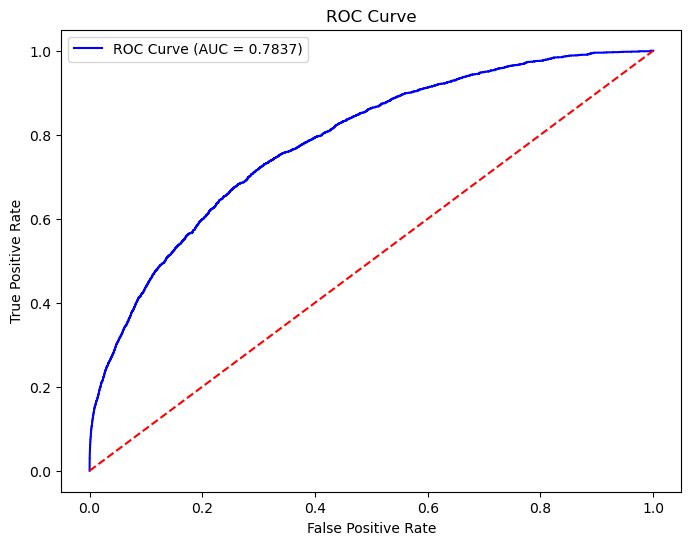

In [11]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()